### Linear svm 解决的问题
$$
\min_{\alpha} \quad \frac{1}{2} \alpha^T Q \alpha + p^T \alpha \\
\text{s.t.} \quad y^T \alpha = 0, \\
0 \leq \alpha_i \leq C, \quad i=1,\cdots,N
$$

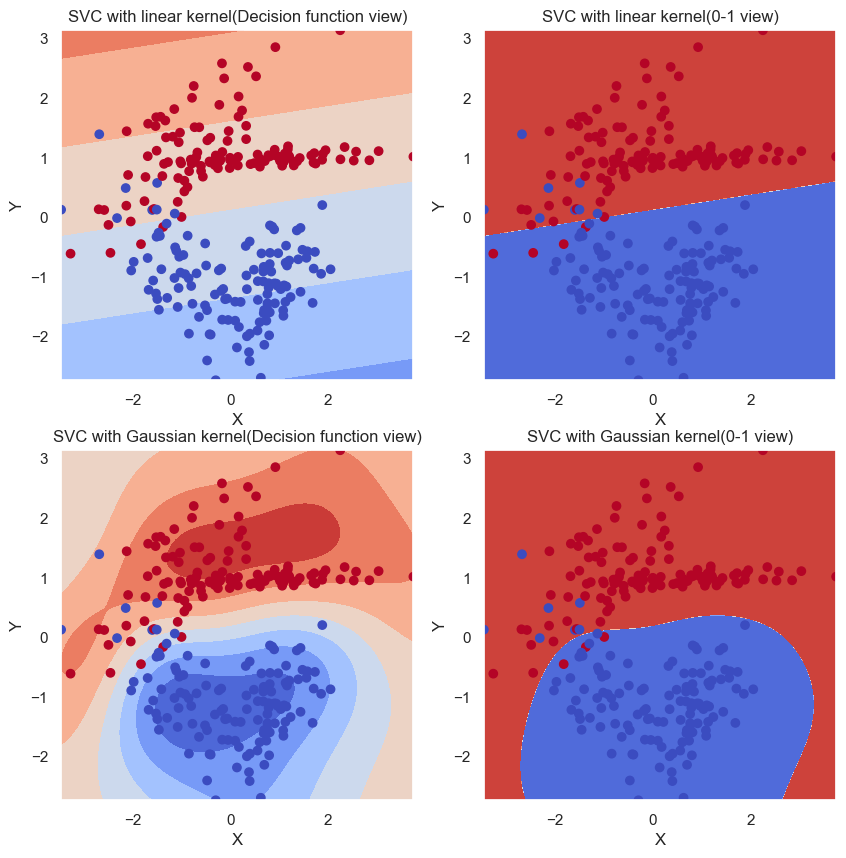

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import svc
import importlib
importlib.reload(svc)

try:
    import seaborn as sns
    sns.set()
except:
    pass

RANDOM_STATE = 202

X, y = make_classification(
    n_samples=250,
    n_classes=2,
    n_features=2,
    n_redundant=0,
    random_state=RANDOM_STATE,
)

x_min = np.min(X[:, 0])
x_max = np.max(X[:, 0])
y_min = np.min(X[:, 1])
y_max = np.max(X[:, 1])

plot_x = np.linspace(x_min - 1, x_max + 1, 1001)
plot_y = np.linspace(x_min - 1, x_max + 1, 1001)
xx, yy = np.meshgrid(plot_x, plot_y)

clf = svc.BiLinearSVC().fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap = plt.cm.coolwarm

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.contourf(xx, yy, Z, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('SVC with linear kernel(Decision function view)')

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.subplot(2, 2, 2)
plt.contourf(xx, yy, Z, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('SVC with linear kernel(0-1 view)')

clf = svc.BiKernelSVC().fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.subplot(2, 2, 3)
plt.contourf(xx, yy, Z, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('SVC with Gaussian kernel(Decision function view)')

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.subplot(2, 2, 4)
plt.contourf(xx, yy, Z, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('SVC with Gaussian kernel(0-1 view)')

plt.show()

In [2]:
print(f'X.shape={X.shape}; y.shape={y.shape}')

X.shape=(250, 2); y.shape=(250,)


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 加载数据集
data = load_iris()
X, y = data.data, data.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 创建决策树分类器
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 测试模型
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 可视化决策树（需要 graphviz 支持）
from sklearn.tree import export_text

print(export_text(clf, feature_names=data.feature_names))

Accuracy: 1.00
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2

